# Data Science Job Salaries Dataset

## Overview
Data science jobs are some of the fastest-growing, most in-demand in technology. Since 2012, Data Scientist roles have increased by 650 percent, and this rise shows no sign of stopping. The U.S. Bureau of Labor Statistics predicts that the demand for data science skills will increase another 27.9 percent by 2026. And, according to a report from McKinsey, that spells a shortage of between 140,000 and 190,000 people with analytical skills in the U.S. alone—not to mention another 1.5 million managers and analysts who will be required to understand how data analysis drives decision-making.

Data Scientist salaries have also risen with demand; Data Scientists can typically expect to make six figures. Demand also translates into an ability to relocate far more easily—from city to city, and even internationally.

---

## Feature Description

- **work_year** - The year the salary was paid  
- **experience_level** - The experience level in the job during the year with the following possible values:  
  - EN: Entry-level / Junior  
  - MI: Mid-level / Intermediate  
  - SE: Senior-level/ Expert  
  - EX: Executive-level / Director  

- **employment_type** - The type of employment for the role:  
  - PT: Part-time  
  - FT: Full-time  
  - CT: Contract  
  - FL: Freelance  

- **job_title** - The role worked in during the year  
- **salary** - The total gross salary amount paid  
- **salary_currency** - The currency of the salary paid as an ISO 4217 currency code  
- **salary_in_usd** - The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com)  
- **employee_residence** - Employee's primary country of residence during the work year (ISO 3166 country code)  
- **remote_ratio** - The overall amount of work done remotely, possible values:  
  - 0: No remote work (less than 20%)  
  - 50: Partially remote  
  - 100: Fully remote (more than 80%)  

- **company_location** - The country of the employer's main office or contracting branch (ISO 3166 country code)  
- **company_size** - The average number of people that worked for the company during the year:  
  - S: Less than 50 employees (small)  
  - M: 50 to 250 employees (medium)  
  - L: More than 250 employees (large)  

---

## Goal of the Notebook

### Univariate Analysis
- Explore every feature in the dataset

### Work Year Analysis
- Analysis of Work Year with Salary and Remote Ratio

### Experience Level Analysis
- Explore Experience Level with Employment Type  
- Analyze Top 3 Job Titles


import pandas as pd

In [7]:
data=pd.read_csv(r"C:\Users\dsrih\NANI\Downloads\Data Science Job Salaries.csv")

In [8]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [9]:
# Check for missing values
print(data.isnull().sum())
# Fill missing values (example strategies)
data['salary_in_usd'].fillna(data['salary_in_usd'].median(),inplace=True)
# Replace with median
data['company_size'].fillna('Unknown', inplace=True)
# Drop rows with critical missing data
data.dropna(subset=['job_title', 'experience_level'],
inplace=True)
# Verify no missing values remain
print(data.isnull().sum())


Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64
Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [10]:
# Standardize text case for categorical columns
data['job_title'] = data['job_title'].str.lower()
data['company_size'] = data['company_size'].str.capitalize()
# Verify unique values
print(data['job_title'].unique())
print(data['company_size'].unique())

['data scientist' 'machine learning scientist' 'big data engineer'
 'product data analyst' 'machine learning engineer' 'data analyst'
 'lead data scientist' 'business data analyst' 'lead data engineer'
 'lead data analyst' 'data engineer' 'data science consultant'
 'bi data analyst' 'director of data science' 'research scientist'
 'machine learning manager' 'data engineering manager'
 'machine learning infrastructure engineer' 'ml engineer' 'ai scientist'
 'computer vision engineer' 'principal data scientist'
 'data science manager' 'head of data' '3d computer vision researcher'
 'data analytics engineer' 'applied data scientist'
 'marketing data analyst' 'cloud data engineer' 'financial data analyst'
 'computer vision software engineer' 'director of data engineering'
 'data science engineer' 'principal data engineer'
 'machine learning developer' 'applied machine learning scientist'
 'data analytics manager' 'head of data science' 'data specialist'
 'data architect' 'finance data anal

In [12]:
# Encode categorical variables
data['experience_level'] = data['experience_level'].map({'EN':
0, 'MI': 1, 'SE': 2, 'EX': 3})
data['employment_type'] = data['employment_type'].map({'PT': 0,
'FT': 1, 'CT': 2, 'FL': 3})
# Add a salary ratio feature
data['salary_ratio'] = data['salary'] / data['salary_in_usd']
# Group salaries by company size
grouped_salary =data.groupby('company_size')['salary_in_usd'].mean()
print(grouped_salary)

company_size
L    119242.994949
M    116905.466258
S     77632.674699
Name: salary_in_usd, dtype: float64


       Unnamed: 0    work_year  experience_level  employment_type  \
count  607.000000   607.000000        607.000000       607.000000   
mean   303.000000  2021.405272          1.401977         1.004942   
std    175.370085     0.692133          0.785510         0.226121   
min      0.000000  2020.000000          0.000000         0.000000   
25%    151.500000  2021.000000          1.000000         1.000000   
50%    303.000000  2022.000000          2.000000         1.000000   
75%    454.500000  2022.000000          2.000000         1.000000   
max    606.000000  2022.000000          3.000000         3.000000   

             salary  salary_in_usd  remote_ratio  salary_ratio  
count  6.070000e+02     607.000000     607.00000    607.000000  
mean   3.240001e+05  112297.869852      70.92257      7.187409  
std    1.544357e+06   70957.259411      40.70913     38.927754  
min    4.000000e+03    2859.000000       0.00000      0.727026  
25%    7.000000e+04   62726.000000      50.00000     

C:\Users\dsrih\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


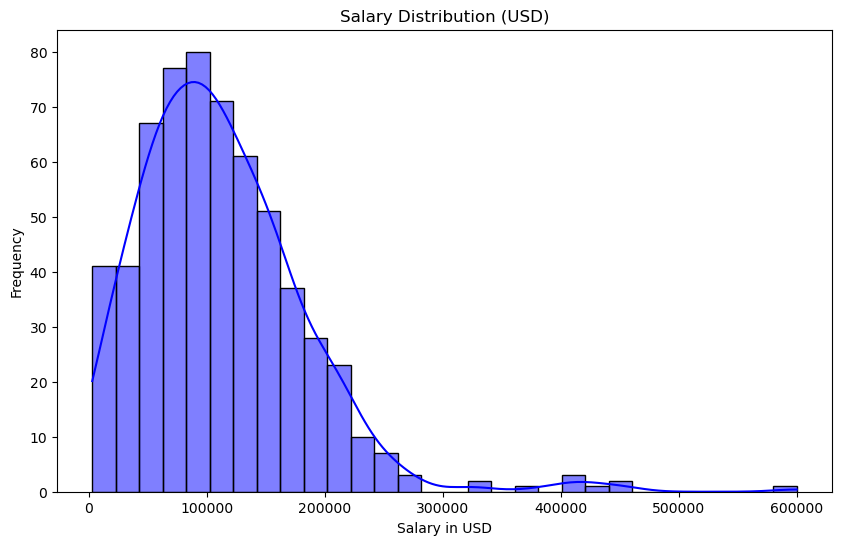

In [13]:
# Summary statistics
print(data.describe())
# Analyze salary distribution
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(data['salary_in_usd'], bins=30, kde=True,color='blue')
plt.title('Salary Distribution (USD)')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

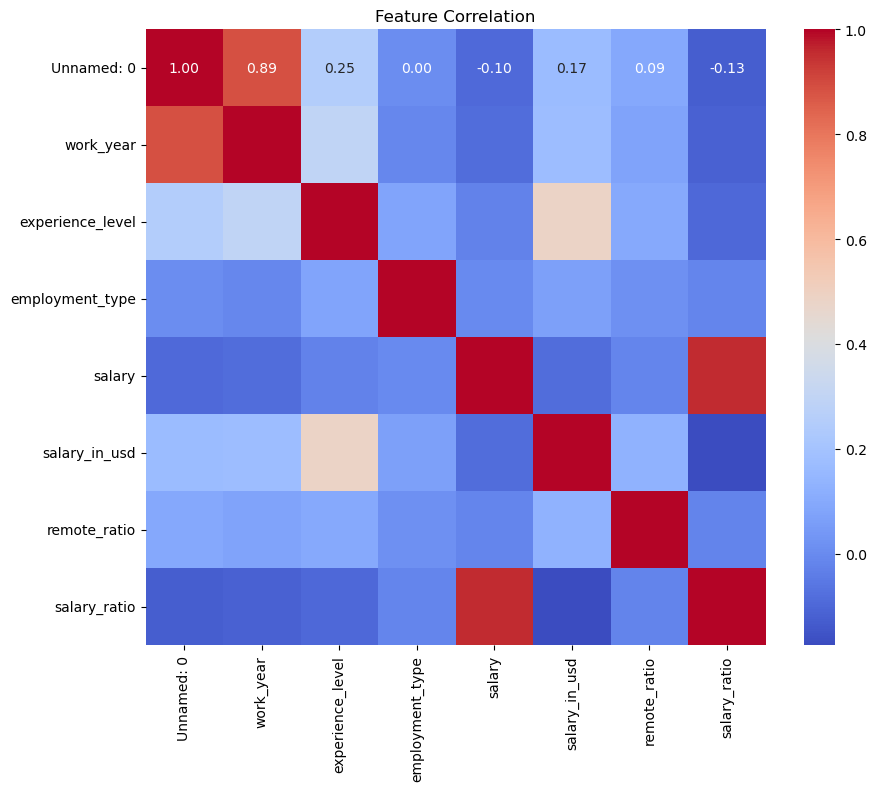

In [15]:
# Keep only numeric columns
numeric_data = data.select_dtypes(include='number')

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation')
plt.show()

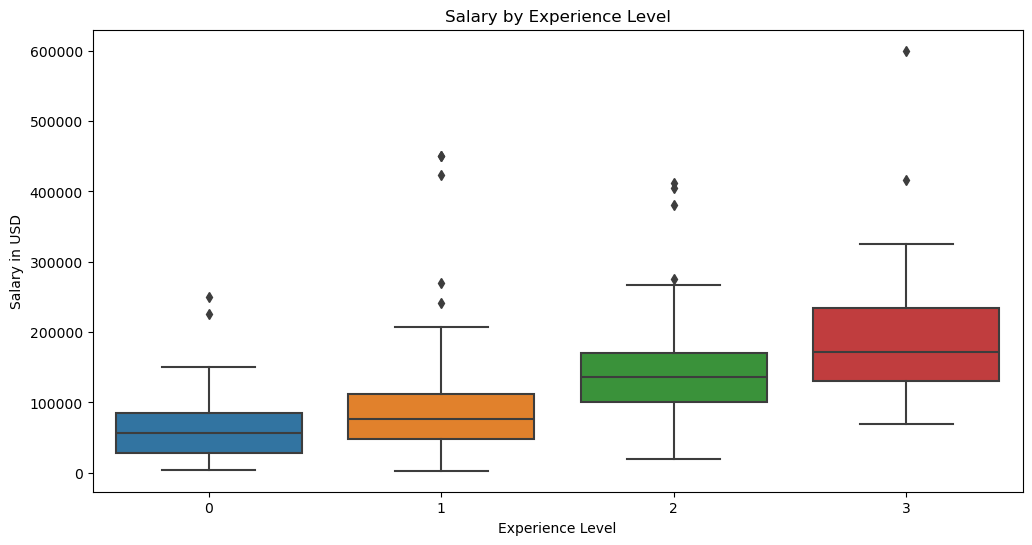

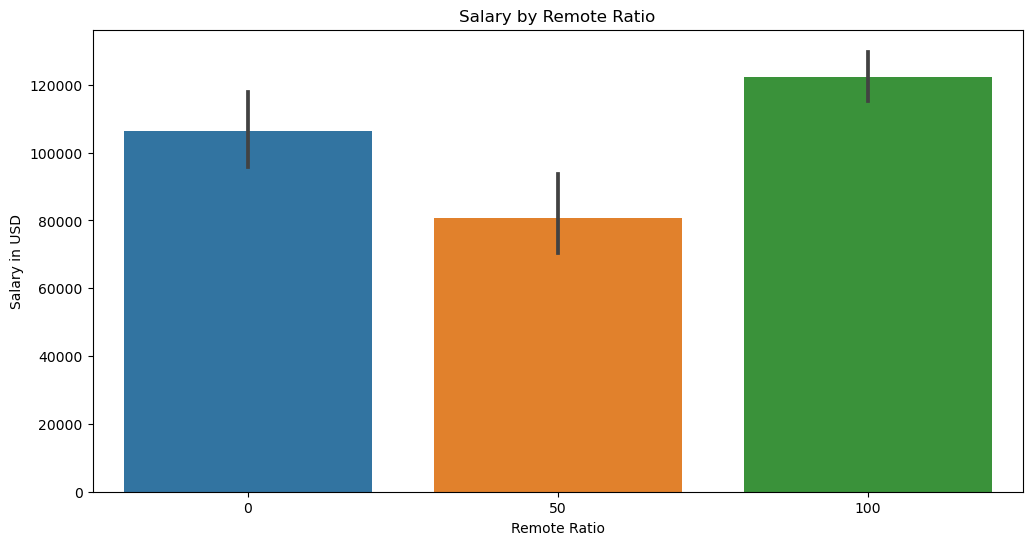

In [16]:
# Boxplot for salaries by experience level
plt.figure(figsize=(12, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=data)
plt.title('Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()
# Remote ratio vs salary
plt.figure(figsize=(12, 6))
sns.barplot(x='remote_ratio', y='salary_in_usd', data=data)
plt.title('Salary by Remote Ratio')
plt.xlabel('Remote Ratio')
plt.ylabel('Salary in USD')
plt.show()

In [20]:
import streamlit as st
st.title('Data Science Job Salaries')
# Upload summary statistics
st.write(data.describe())
# Visualization
st.line_chart(data['salary_in_usd'])
# Filter by job title
job_filter = st.selectbox('Select Job Title',
data['job_title'].unique())
filtered_data = data[data['job_title'] == job_filter]
st.bar_chart(filtered_data['salary_in_usd'])

2025-04-23 21:47:12.899 
  command:

    streamlit run C:\Users\dsrih\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [23]:
df.shape

(607, 11)

In [24]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [26]:
df.duplicated().sum()

42

In [27]:
df.drop_duplicates(inplace=True)

In [29]:
# change country names from ISO2 to original names
# There are two features containing country names,
"company_location" and "employee_residence"
!pip install -q country_converter
import country_converter
cc = country_converter.CountryConverter()
df['company_location'] = cc.convert(df['company_location'],to='name_short')
df['employee_residence'] = cc.convert(df['employee_residence'],to='name_short')

In [30]:
# experience level
df['experience_level'].value_counts()

experience_level
SE    243
MI    208
EN     88
EX     26
Name: count, dtype: int64

In [31]:
df['experience_level'] = df['experience_level'].map({
'SE': 'Senior',
'MI': 'Mid',
'EN': 'Entry',
'EX': 'Executive'
})

In [34]:
df['experience_level'].value_counts()

experience_level
Senior       243
Mid          208
Entry         88
Executive     26
Name: count, dtype: int64

In [35]:
df['employment_type'] = df['employment_type'].map({
'FT': 'Full-time',
'PT': 'Part-time',
'CT': 'Contract',
'FL': 'Freelance'
})

In [36]:
df['employment_type'].value_counts()

employment_type
Full-time    546
Part-time     10
Contract       5
Freelance      4
Name: count, dtype: int64

In [37]:
# company size
df['company_size'].value_counts()

company_size
M    290
L    193
S     82
Name: count, dtype: int64

In [38]:
df['company_size']= df['company_size'].map({
'S': 'Small',
'M': 'Medium',
'L': 'Large'
})

In [39]:
df['company_size'].value_counts()

company_size
Medium    290
Large     193
Small      82
Name: count, dtype: int64

In [40]:
# drop salary and salary_currency features (salary_in_usd is enough to keep on)
df.drop(['salary', 'salary_currency'], axis=1, inplace=True)
# rename salary_in_usd to salary
df.rename(columns={'salary_in_usd': 'salary'}, inplace=True)

In [41]:
df['work_year'].value_counts()

work_year
2022    278
2021    215
2020     72
Name: count, dtype: int64

In [42]:
df['remote_ratio'].value_counts()

remote_ratio
100    346
0      121
50      98
Name: count, dtype: int64

In [43]:
# renmame remote_ratio to job_type
df.rename(columns={'remote_ratio': 'job_type'}, inplace=True)
# change 100 to remote, 0 to onsite, 50 to hybrid
df['job_type'] = df['job_type'].map({
100: 'remote',
0: 'onsite',
50: 'hybrid',
})

In [44]:
df['job_type'].value_counts()

job_type
remote    346
onsite    121
hybrid     98
Name: count, dtype: int64

In [46]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'employee_residence', 'job_type', 'company_location',
       'company_size'],
      dtype='object')

In [47]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,employee_residence,job_type,company_location,company_size
0,2020,Mid,Full-time,Data Scientist,79833,Germany,onsite,Germany,Large
1,2020,Senior,Full-time,Machine Learning Scientist,260000,Japan,onsite,Japan,Small
2,2020,Senior,Full-time,Big Data Engineer,109024,United Kingdom,hybrid,United Kingdom,Medium
3,2020,Mid,Full-time,Product Data Analyst,20000,Honduras,onsite,Honduras,Small
4,2020,Senior,Full-time,Machine Learning Engineer,150000,United States,hybrid,United States,Large


C:\Users\dsrih\AppData\Local\Temp\ipykernel_19236\2805041568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['salary'])
C:\Users\dsrih\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Salary Distribution')

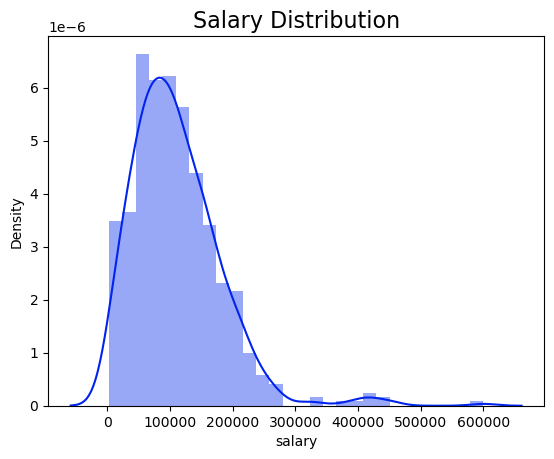

In [48]:
# Salary distribution
sns.set_palette('winter')
ax = sns.distplot(df['salary'])
ax.set_title('Salary Distribution', fontdict={'fontsize': 16})

In [51]:
# mean salary of employees with different experience levels
mean_s_exp_lv = df.groupby('experience_level')['salary'].mean().sort_values()
mean_s_exp_lv

experience_level
Entry         61643.318182
Mid           87792.995192
Senior       138374.880658
Executive    199392.038462
Name: salary, dtype: float64

In [52]:
sns.set_style('whitegrid')

Text(0.5, 1.0, 'Experience Level VS Salary')

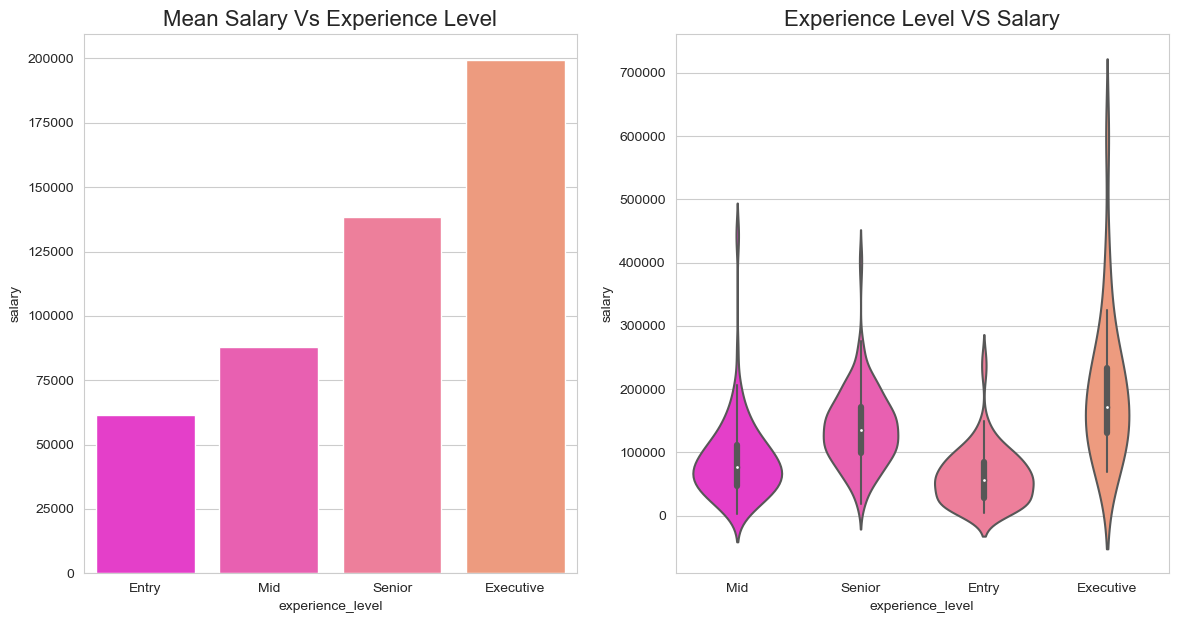

In [53]:
plt.figure(figsize=(14, 7))
sns.set_palette('spring')
plt.subplot(1, 2, 1)
ax = sns.barplot(x=mean_s_exp_lv.index, y=mean_s_exp_lv)
ax.set_title('Mean Salary Vs Experience Level',
fontdict={'fontsize': 16})
plt.subplot(1, 2, 2)
ax = sns.violinplot(data=df, x='experience_level', y='salary')
ax.set_title('Experience Level VS Salary',
fontdict={'fontsize': 16})

In [55]:
# mean salary of employees with different employment types
mean_s_emp_type = df.groupby('employment_type')['salary'].mean().sort_values()
mean_s_emp_type

employment_type
Part-time     33070.500000
Freelance     48000.000000
Full-time    111811.838828
Contract     184575.000000
Name: salary, dtype: float64

Text(0.5, 1.0, 'Employment Type VS Salary')

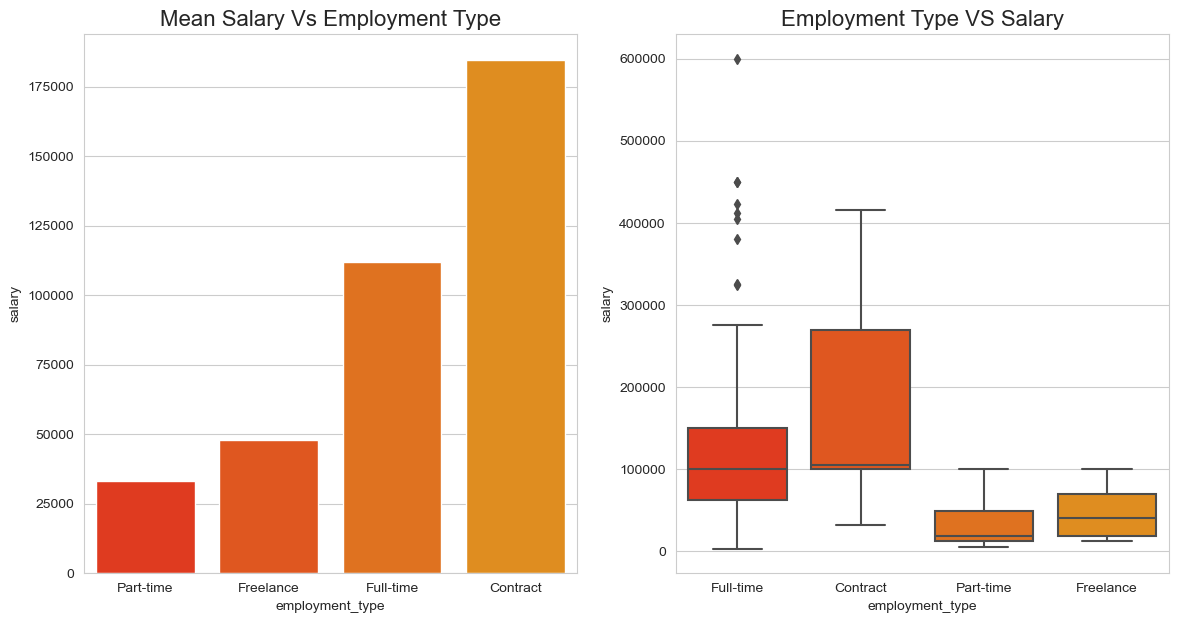

In [56]:
plt.figure(figsize=(14, 7))
sns.set_palette('autumn')
plt.subplot(1, 2, 1)
ax = sns.barplot(x=mean_s_emp_type.index, y=mean_s_emp_type)
ax.set_title('Mean Salary Vs Employment Type',
fontdict={'fontsize': 16})
plt.subplot(1, 2, 2)
ax = sns.boxplot(data=df, x='employment_type', y='salary')
ax.set_title('Employment Type VS Salary', fontdict={'fontsize':16})

In [58]:
# mean salary of employees from different company sizes
mean_s_cmp_size = df.groupby('company_size')['salary'].mean().sort_values()
mean_s_cmp_size

company_size
Small      77872.097561
Medium    114807.079310
Large     118213.880829
Name: salary, dtype: float64

C:\Users\dsrih\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dsrih\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dsrih\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Company Size VS Salary')

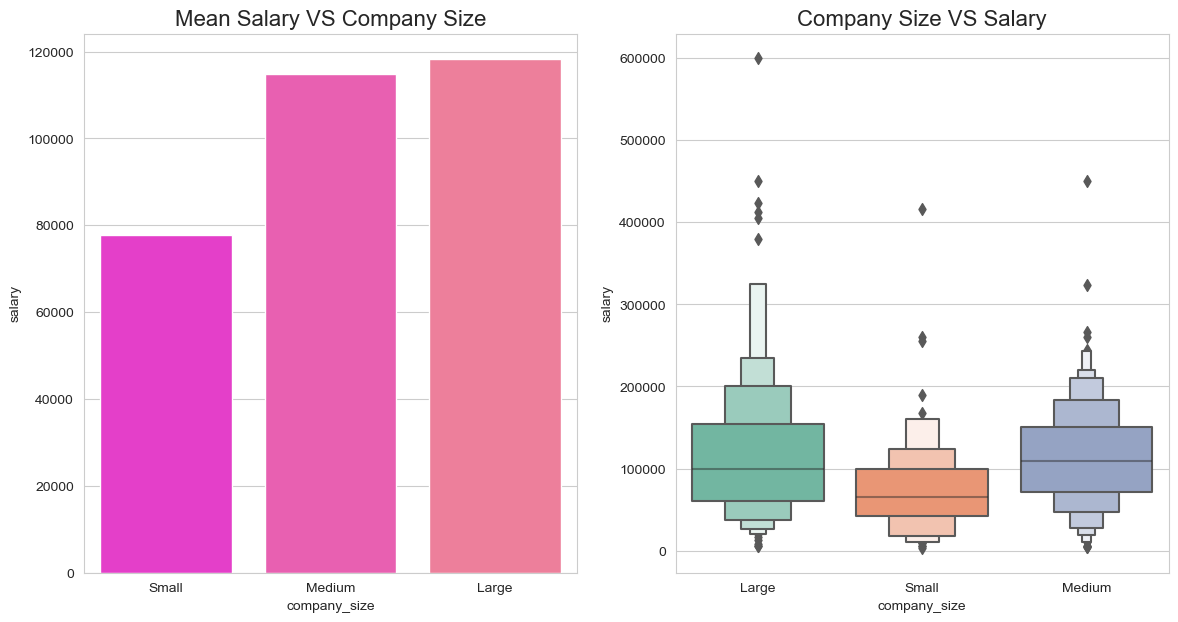

In [59]:
plt.figure(figsize=(14, 7))
sns.set_palette('spring')
plt.subplot(1, 2, 1)
ax = sns.barplot(x=mean_s_cmp_size.index, y=mean_s_cmp_size)
ax.set_title('Mean Salary VS Company Size',
fontdict={'fontsize': 16})
plt.subplot(1, 2, 2)
sns.set_palette('Set2')
ax = sns.boxenplot(data=df, x='company_size', y='salary')
ax.set_title('Company Size VS Salary', fontdict={'fontsize':16})

In [60]:
# mean salary of employees with different job types
mean_s_jtype = df.groupby('job_type')['salary'].mean().sort_values()

Text(0.5, 1.0, 'Job Type VS Salary')

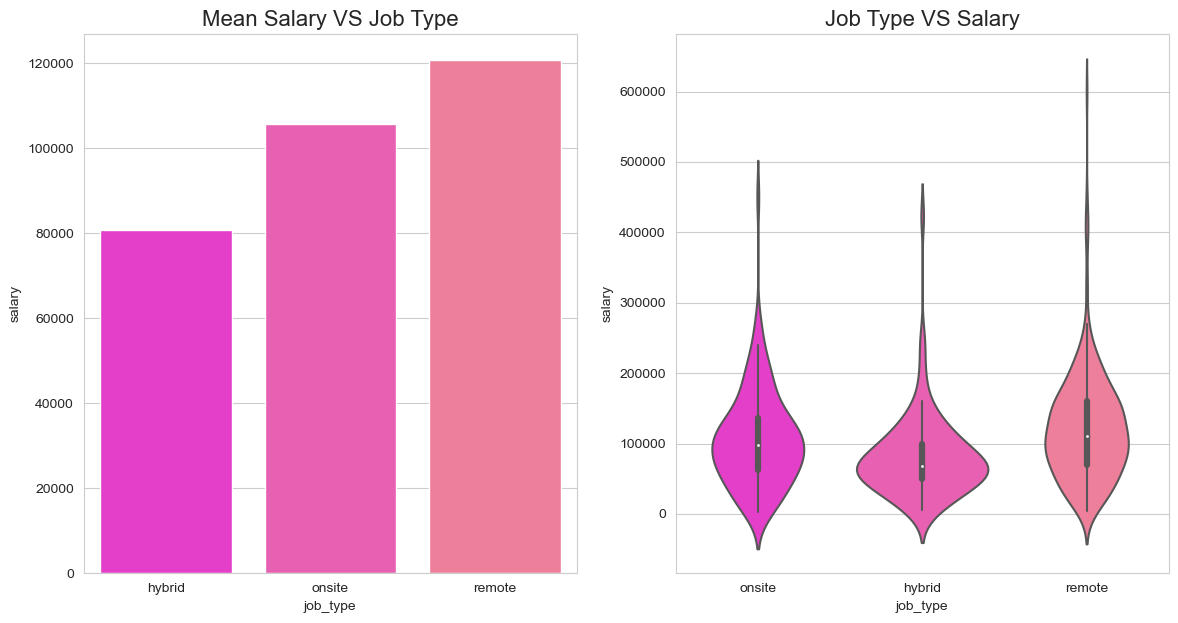

In [61]:
plt.figure(figsize=(14, 7))
sns.set_palette('spring')
plt.subplot(1, 2, 1)
ax = sns.barplot(x=mean_s_jtype.index, y=mean_s_jtype)
ax.set_title('Mean Salary VS Job Type', fontdict={'fontsize':
16})
plt.subplot(1, 2, 2)
ax = sns.violinplot(data=df, x='job_type', y='salary')
ax.set_title('Job Type VS Salary', fontdict={'fontsize': 16})

C:\Users\dsrih\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dsrih\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dsrih\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dsrih\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

Text(0.5, 1.0, 'Job Type & Company Size VS Salary')

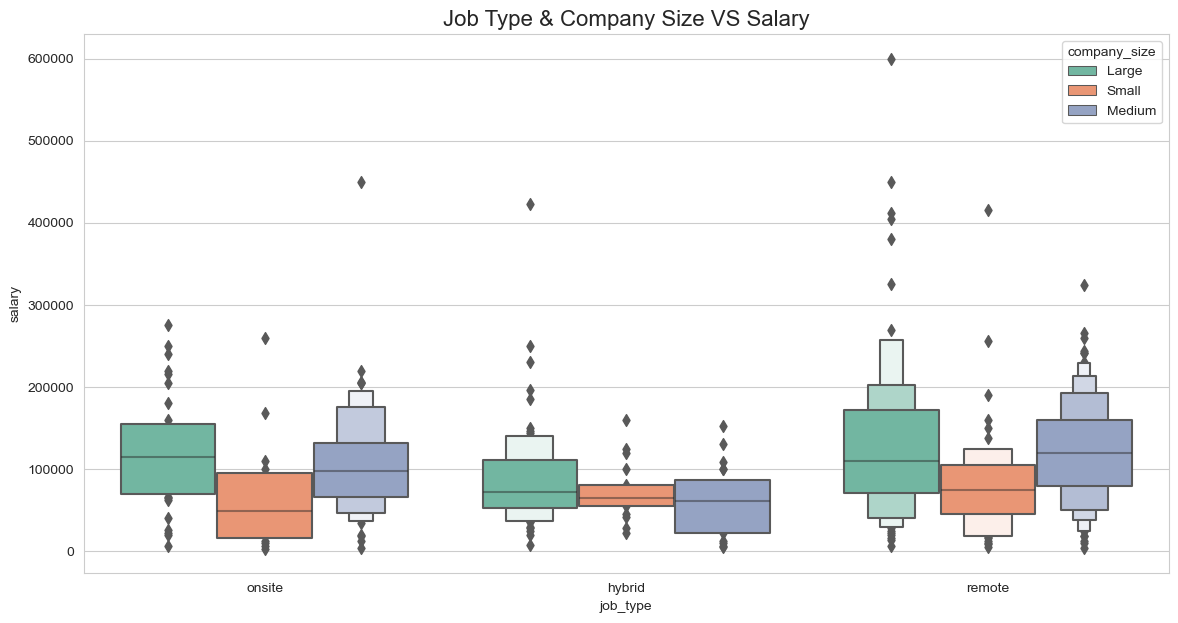

In [62]:
# job type and company size VS salary
plt.figure(figsize=(14, 7))
sns.set_palette('Set2')
ax = sns.boxenplot(data=df, x='job_type', y='salary',
hue='company_size')
ax.set_title('Job Type & Company Size VS Salary',fontdict={'fontsize': 16})

Text(0, 0.5, '')

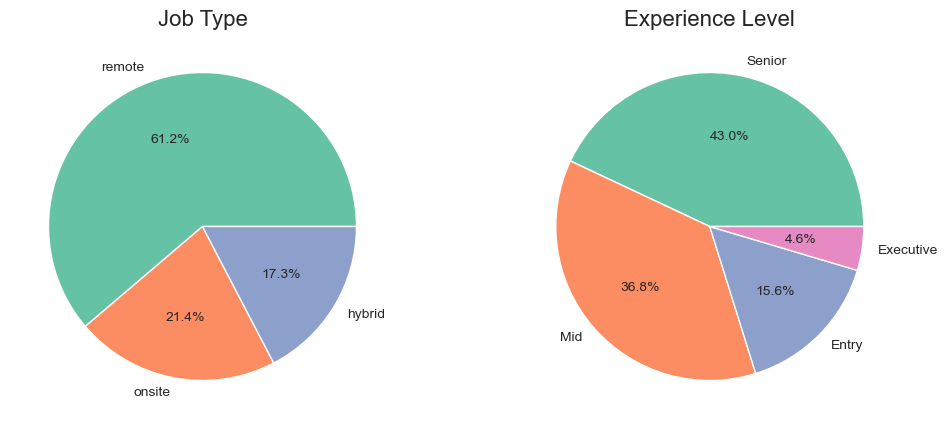

In [63]:
plt.figure(figsize=(12, 5))
sns.set_palette('Set2')
# job types
plt.subplot(1,2,1)
ax = df['job_type'].value_counts().plot(kind='pie',
autopct='%1.1f%%')
ax.set_title('Job Type', fontdict={'fontsize': 16})
ax.set_ylabel('')
# experience levels
plt.subplot(1,2,2)
ax = df['experience_level'].value_counts().plot(kind='pie',
autopct='%1.1f%%')
ax.set_title('Experience Level', fontdict={'fontsize': 16})
ax.set_ylabel('')

In [67]:
# top 10 data science roles according to mean salary
top_ds_roles = df.groupby('job_title')['salary'].mean().sort_values(ascending=False)
# ignore those ds roles which happened only once
top_ds_roles_ = pd.Series(data=list(top_ds_roles.index)).apply(lambda x: x if list(df['job_title']).count(x) > 1 else 0)
top_ds_roles_that_happened_gt_1 = top_ds_roles_[top_ds_roles_!= 0][:9]
top_ds_roles_that_happened_gt_1 = top_ds_roles[top_ds_roles_that_happened_gt_1]
top_ds_roles_that_happened_gt_1

job_title
Principal Data Engineer       328333.333333
Financial Data Analyst        275000.000000
Principal Data Scientist      215242.428571
Director of Data Science      195074.000000
Data Architect                177873.909091
Applied Data Scientist        175655.000000
Analytics Engineer            175000.000000
Head of Data                  160162.600000
Machine Learning Scientist    158412.500000
Name: salary, dtype: float64

Text(0.5, 1.0, 'Top 10 data science roles with highest number of openings')

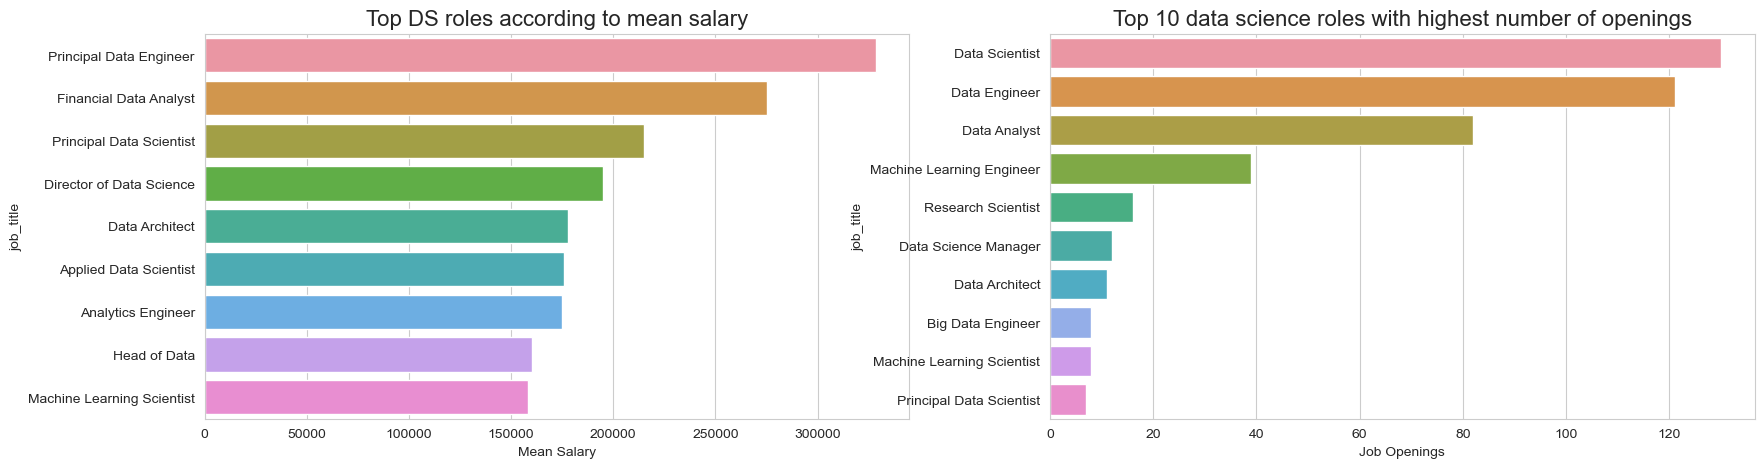

In [69]:
plt.figure(figsize=(20, 5))
# top 10 data science roles according to mean salary
plt.subplot(1, 2, 1)
top_ds_roles = top_ds_roles_that_happened_gt_1
ax = sns.barplot(y=top_ds_roles.index, x=top_ds_roles)
ax.set_xlabel('Mean Salary')
ax.set_title('Top DS roles according to mean salary',
fontdict={'fontsize': 16})
# top 10 data science roles with highest number of openings
plt.subplot(1, 2, 2)
top_dr = df['job_title'].value_counts()[:10]
ax = sns.barplot(x=top_dr, y=top_dr.index)
ax.set_xlabel('Job Openings')
ax.set_title('Top 10 data science roles with highest number of openings', fontdict={'fontsize': 16})

In [72]:
# top 10 company-locations according to mean salary
top_cmp_locations = df.groupby('company_location')['salary'].mean().sort_values(ascending=False)[:10]
top_cmp_locations

company_location
Russia                  157500.000000
United States           144292.993711
New Zealand             125000.000000
Israel                  119059.000000
Japan                   114127.333333
Australia               108042.666667
Canada                  100121.857143
Iraq                    100000.000000
United Arab Emirates    100000.000000
Algeria                 100000.000000
Name: salary, dtype: float64

Text(0.5, 1.0, 'Top 10 countries having most DS job opportunities')

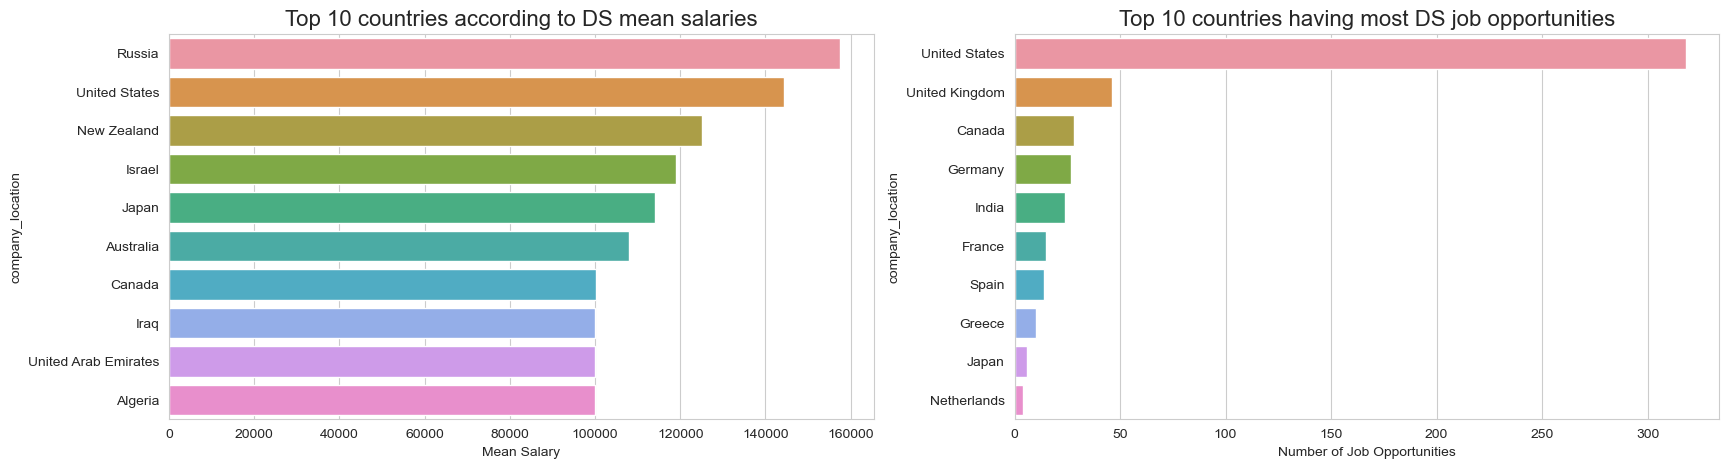

In [75]:
plt.figure(figsize=(20, 5))
# top 10 company-locations according to mean salary
plt.subplot(1, 2, 1)
ax = sns.barplot(y=top_cmp_locations.index,x=top_cmp_locations)
ax.set_xlabel('Mean Salary')
ax.set_title('Top 10 countries according to DS mean salaries',fontdict={'fontsize': 16})
# top 10 company-locations having most job opportunities
top_cl = df['company_location'].value_counts()[:10]
plt.subplot(1, 2, 2)
ax = sns.barplot(x=top_cl, y=top_cl.index)
ax.set_xlabel('Number of Job Opportunities')
ax.set_title('Top 10 countries having most DS job opportunities', fontdict={'fontsize': 16})

In [77]:
top_emp_residence = df.groupby('employee_residence')['salary'].mean().sort_values(ascending=False)[:10]
top_emp_residence

employee_residence
Malaysia         200000.000000
Puerto Rico      160000.000000
United States    150094.918644
New Zealand      125000.000000
Switzerland      122346.000000
Australia        108042.666667
Russia           105750.000000
Singapore        104176.500000
Japan            103537.714286
Algeria          100000.000000
Name: salary, dtype: float64

Text(0.5, 0, 'Job Openings')

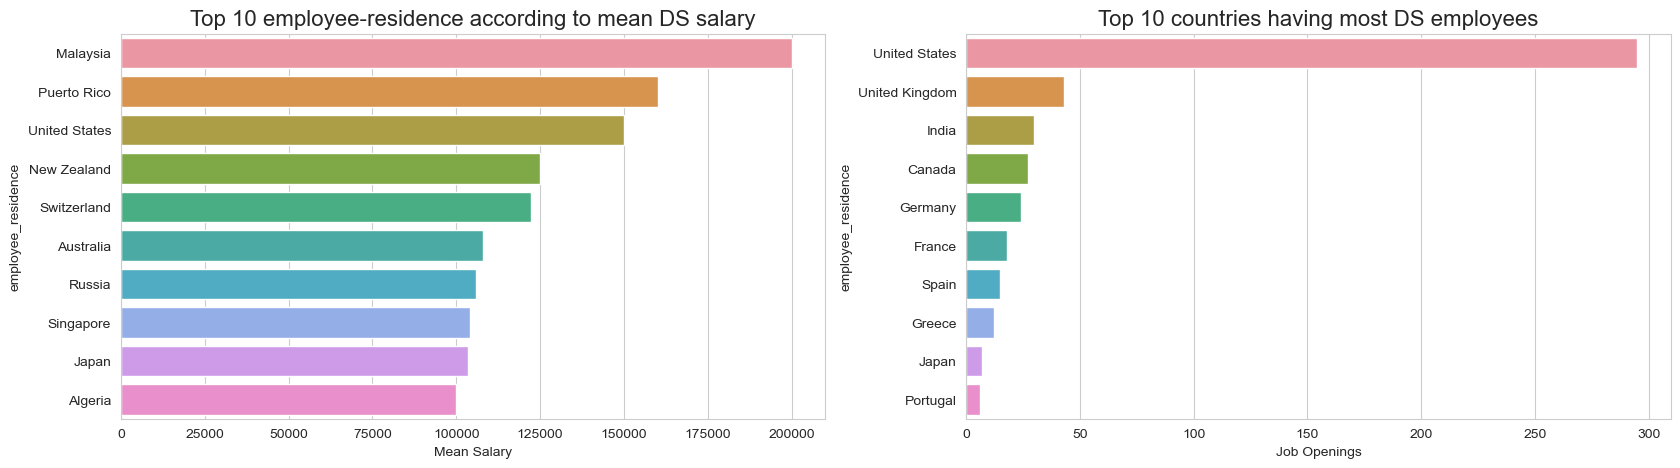

In [79]:
plt.figure(figsize=(20, 5))
# top 10 employee-residence according to mean salary
plt.subplot(1,2,1)
ax = sns.barplot(y=top_emp_residence.index,
x=top_emp_residence)
ax.set_xlabel('Mean Salary')
ax.set_title('Top 10 employee-residence according to mean DS salary', fontdict={'fontsize': 16})
# top 10 employee-residence according to number of job openings
plt.subplot(1,2,2)
top_er = df['employee_residence'].value_counts()[:10]
ax = sns.barplot(x=top_er, y=top_er.index)
ax.set_title('Top 10 countries having most DS employees',
fontdict={'fontsize': 16})
ax.set_xlabel('Job Openings')

Text(0.5, 1.0, 'Company Size VS Job Types Counts')

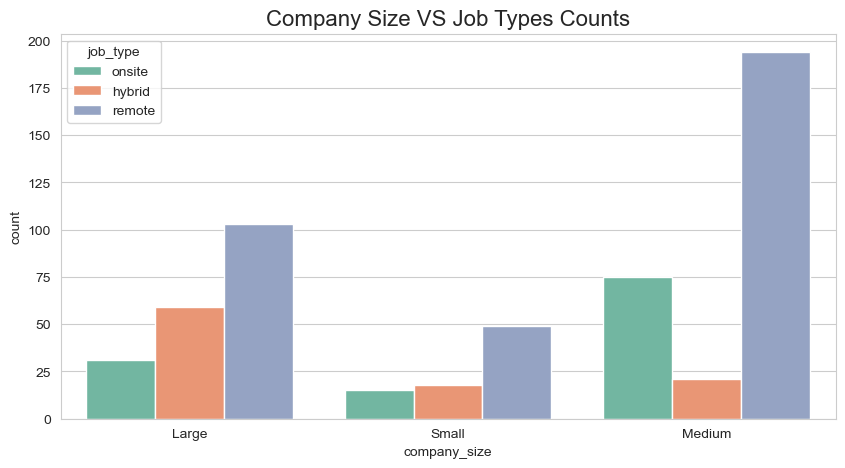

In [80]:
plt.figure(figsize=(10, 5))
sns.set_palette('Set2')
ax = sns.countplot(data=df, x='company_size', hue='job_type')
ax.set_title('Company Size VS Job Types Counts',
fontdict={'fontsize': 16})